# I Solving the Sum of Two Digits Programming Challenge

## C++

In [1]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [2]:
!g++ APlusB.cpp -o APlusB 
!./APlusB

3
4
7

### Test input output files

In [3]:
%%writefile input1.txt
4 8

Writing input1.txt


In [4]:
%%writefile output1.txt
12

Writing output1.txt


In [5]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [6]:
%%writefile output2.txt
4

Writing output2.txt


In [7]:
!./APlusB < input1.txt

12

In [8]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [9]:
!grep -xvFf output1.txt output1.txt 

In [10]:
!grep -xvFf output1.txt output2.txt 

4


In [11]:
!grep -xvFf output2.txt output1.txt 

12


In [12]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [13]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [14]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [16]:
!python sum.py

90 13
103


In [17]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [18]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [19]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [20]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

3
5
6
1
30


### Test 1: Small numbers

In [21]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [22]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [23]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [24]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [25]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [26]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [29]:
%%writefile input3.txt
20

Overwriting input3.txt


In [32]:
%%writefile random_stress.cpp
#include <iostream>
#include <cstdlib>
#include <ctime>

using namespace std;

int main() {
  int n;
  cin>>n;

  srand(time(NULL));

  for(int i=0; i<n; i++){
    int num=rand() % 19+2;
    cout<<num<<endl;
  }
  return 0;
  }



Overwriting random_stress.cpp


In [33]:
!g++ random_stress.cpp -o random_stress
!./random_stress < input3.txt

3
7
15
19
3
20
17
20
10
20
3
5
4
7
20
2
6
6
15
5


### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [34]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [35]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [39]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000
39999800000

real	2m23.095s
user	2m21.535s
sys	0m0.063s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [40]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Writing test_init_vectors.cpp


In [41]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [42]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [43]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Writing max_pairwise_product_long_execints.cpp


In [44]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [45]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [46]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [52]:
%%writefile max_pairwise_product_efficient.cpp
// We include the needed libraries for input/output and working with vectors
#include <iostream>
#include <vector>
#include <algorithm>

// This function helps us find the product of the two largest numbers in a list
long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {

    // Find the size of the numbers list
    int n = numbers.size();
    execints++; //1

    // Create a variable to remember the position of the largest number we've found so far
    int max_index1 = -1;
    execints++; //1

    // Go through each number in the list
    execints++; //1
    for (int i = 0; i < n; ++i) {
        execints += 2; //2

        // If we find a number bigger than the current largest number, remember its position
        if (max_index1 == -1 || numbers[i] > numbers[max_index1]) {
            max_index1 = i;
            execints++; //1
        }
    }

    // Create another variable to remember the position of the second-largest number
    int max_index2 = -1;
    execints++; //1

    // Go through each number in the list again, but skip the largest number we found earlier
    execints++; //1
    for (int i = 0; i < n; ++i) {
        execints += 2; //2

        // If we find a number bigger than the current second-largest number, and it's not the largest number, remember its position
        if ((i != max_index1) && (max_index2 == -1 || numbers[i] > numbers[max_index2])) {
            max_index2 = i;
            execints++; //1
        }
    }

    // Multiply the two largest numbers and return the result
    return (long long) numbers[max_index1] * numbers[max_index2];
}

// This is the main part of the program that runs first
int main() {
    // A variable to count the number of instructions executed
    long long execints = 0LL;

    // Read the size of the numbers list from the user
    int n;
    execints++; //1

    std::cin >> n;
    execints++; //1

    // Create a list of numbers with the size given by the user
    std::vector<int> numbers(n);
    execints += n; //n

    // Read each number from the user and add it to the list
    execints++; //1
    for (int i = 0; i < n; ++i) {
        execints += 2; //2

        std::cin >> numbers[i];
        execints++; //1
    }

    // Call the MaxPairwiseProduct function to find the product of the two largest numbers
    execints++; //1
    long long result = MaxPairwiseProduct(numbers, execints);

    // Show the result and the number of instructions executed
    execints++; //1
    std::cout << result << "\n";
    std::cout << execints << "\n";
    return 0;
}


Overwriting max_pairwise_product_efficient.cpp


Test with inputs 1 and 2



In [53]:
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!./max_pairwise_product_efficient < input1.txt
!./max_pairwise_product_efficient < input2.txt

90
109
40000000000
65


Test and time it with input 3

In [54]:
!time ./max_pairwise_product_efficient < input3.txt

39999800000
2000009

real	0m0.059s
user	0m0.056s
sys	0m0.003s


20 stress tests

In [72]:
%%writefile max_pairwise_product_efficient_test3.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <cstdlib>
#include <ctime>
#include <fstream>


using namespace std;

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {
  
    // Find the size of the numbers list
    int n = numbers.size();
    execints++; //1

    // Create a variable to remember the position of the largest number we've found so far
    int max_index1 = -1;
    execints++; //1

    // Go through each number in the list
    execints++; //1
    for (int i = 0; i < n; ++i) {
        execints += 2; //2

        // If we find a number bigger than the current largest number, remember its position
        if (max_index1 == -1 || numbers[i] > numbers[max_index1]) {
            max_index1 = i;
            execints++; //1
        }
    }

    // Create another variable to remember the position of the second-largest number
    int max_index2 = -1;
    execints++; //1

    // Go through each number in the list again, but skip the largest number we found earlier
    execints++; //1
    for (int i = 0; i < n; ++i) {
        execints += 2; //2

        // If we find a number bigger than the current second-largest number, and it's not the largest number, remember its position
        if ((i != max_index1) && (max_index2 == -1 || numbers[i] > numbers[max_index2])) {
            max_index2 = i;
            execints++; //1
        }
    }

    // Multiply the two largest numbers and return the result
    return (long long) numbers[max_index1] * numbers[max_index2];
}


int main() {
    // List of input file names
    vector<string> input_files = {"input1.txt", "input2.txt", "input3.txt"};

    // Loop through the input files
    for (const auto &file_name : input_files) {
        // Open the input file
        ifstream input_file(file_name);

        if (input_file.is_open()) {
            // A variable to count the number of instructions executed
            long long execints = 0LL;

            // Read the size of the numbers list from the input file
            int n;
            execints++; //1

            input_file >> n;
            execints++; //1

            // Create a list of numbers with the size read from the input file
            std::vector<int> numbers(n);
            execints += n; //n

            // Read each number from the input file and add it to the list
            execints++; //1
            for (int i = 0; i < n; ++i) {
                execints += 2; //2

                input_file >> numbers[i];
                execints++; //1
            }

            // Close the input file
            input_file.close();

            // Call the MaxPairwiseProduct function to find the product of the two largest numbers
            execints++; //1
            long long result = MaxPairwiseProduct(numbers, execints);

            // Show the result and the number of instructions executed
            execints++; //1
            std::cout << "Result for file " << file_name << ": " << result << "\n";
            std::cout << "Instructions executed: " << execints << "\n\n";
        } else {
            cerr << "Unable to open file " << file_name << "\n";
        }
    }

    return 0;
}


Overwriting max_pairwise_product_efficient_test3.cpp


Count executed instructions in code and verify with inputs 1,2 and 3


In [73]:
!g++ max_pairwise_product_efficient_test3.cpp -o max_pairwise_product_efficient_test3
!./max_pairwise_product_efficient_test3 < input1.txt
!./max_pairwise_product_efficient_test3 < input2.txt
!./max_pairwise_product_efficient_test3 < input3.txt

Result for file input1.txt: 90
Instructions executed: 109

Result for file input2.txt: 40000000000
Instructions executed: 65

Result for file input3.txt: 39999800000
Instructions executed: 2000009

Result for file input1.txt: 90
Instructions executed: 109

Result for file input2.txt: 40000000000
Instructions executed: 65

Result for file input3.txt: 39999800000
Instructions executed: 2000009

Result for file input1.txt: 90
Instructions executed: 109

Result for file input2.txt: 40000000000
Instructions executed: 65

Result for file input3.txt: 39999800000
Instructions executed: 2000009



Calculate estimated time by instruction and number of instructions by second

In [74]:
1.097/2000009

5.48497531761107e-07

### Super efficient solution

Without storing the list in memory and Without calling a function, add in each line a coment with the number of instructions that are executed in that line 

In [75]:
%%writefile max_prw_prod_super.cpp
#include <iostream>
#include <algorithm>

int main() {
    // A variable to count the number of instructions executed
    long long execints = 0LL;

    // Read the size of the numbers list from the user
    int n;
    execints++; //1

    std::cin >> n;
    execints++; //1

    // Initialize variables to store the two largest numbers without storing the entire list in memory
    int max1 = -1, max2 = -1;
    execints += 2; //2

    int num;
    execints++; //1

    // Read each number from the user and update the two largest numbers if necessary
    execints++; //1
    for (int i = 0; i < n; ++i) {
        execints += 2; //2

        std::cin >> num;
        execints++; //1

        if (num > max1) {
            max2 = max1;
            max1 = num;
            execints += 2; //2
        } else if (num > max2) {
            max2 = num;
            execints++; //1
        }
    }

    // Calculate the result as the product of the two largest numbers
    long long result = static_cast<long long>(max1) * max2;
    execints++; //1

    // Show the result and the number of instructions executed
    execints++; //1
    std::cout << result << "\n";
    std::cout << execints << "\n";
    return 0;
}


Writing max_prw_prod_super.cpp


Test with inputs 1 and 2


 

In [76]:
!g++ max_prw_prod_super.cpp -o max_prw_prod_super
!./max_prw_prod_super < input1.txt
!./max_prw_prod_super < input2.txt

90
58
40000000000
34


Test and time it with input 3

In [77]:
!time ./max_prw_prod_super < input3.txt

39999800000
1000008

real	0m0.054s
user	0m0.051s
sys	0m0.003s


20 stress tests 

In [78]:
%%writefile max_prw_prod_super_test3.cpp
#include <iostream>
#include <algorithm>
#include <cstdlib>
#include <ctime>

int main() {
    // Seed the random number generator
    srand(time(NULL));
    
    // A variable to count the number of instructions executed
    long long execints = 0LL;

    int n = 20;
    execints++; //1

    // Initialize variables to store the two largest numbers without storing the entire list in memory
    int max1 = -1, max2 = -1;
    execints += 2; //2

    int num;
    execints++; //1

    // Generate and process random numbers, updating the two largest numbers if necessary
    execints++; //1
    for (int i = 0; i < n; ++i) {
        execints += 2; //2

        num = rand() % 19 + 2;
        execints++; //1

        if (num > max1) {
            max2 = max1;
            max1 = num;
            execints += 2; //2
        } else if (num > max2) {
            max2 = num;
            execints++; //1
        }
    }

    // Calculate the result as the product of the two largest numbers
    long long result = static_cast<long long>(max1) * max2;
    execints++; //1

    // Show the result and the number of instructions executed
    execints++; //1
    std::cout << "Result: " << result << "\n";
    std::cout << "Instructions executed: " << execints << "\n";
    return 0;
}


Writing max_prw_prod_super_test3.cpp


Count executed instructions in code and verify with inputs 1,2 and 3

In [79]:
!g++ max_prw_prod_super_test3.cpp -o max_prw_prod_super_test3
!./max_prw_prod_super < input1.txt
!./max_prw_prod_super < input2.txt
!./max_prw_prod_super < input3.txt

90
58
40000000000
34
39999800000
1000008


Calculate estimated time by instruction and number of instructions by second

In [80]:
!time ./max_prw_prod_super_test3 < input3.txt

Result: 342
Instructions executed: 74

real	0m0.002s
user	0m0.001s
sys	0m0.001s


In [81]:
0.002/74

2.7027027027027027e-05

In [82]:
1/(0.002/74)

37000.0

# Codeforces problem https://codeforces.com/contest/1619/problem/A 

Solve the problem in Colab, submit the solution to Codeforces and add a screenshoot of the submission.

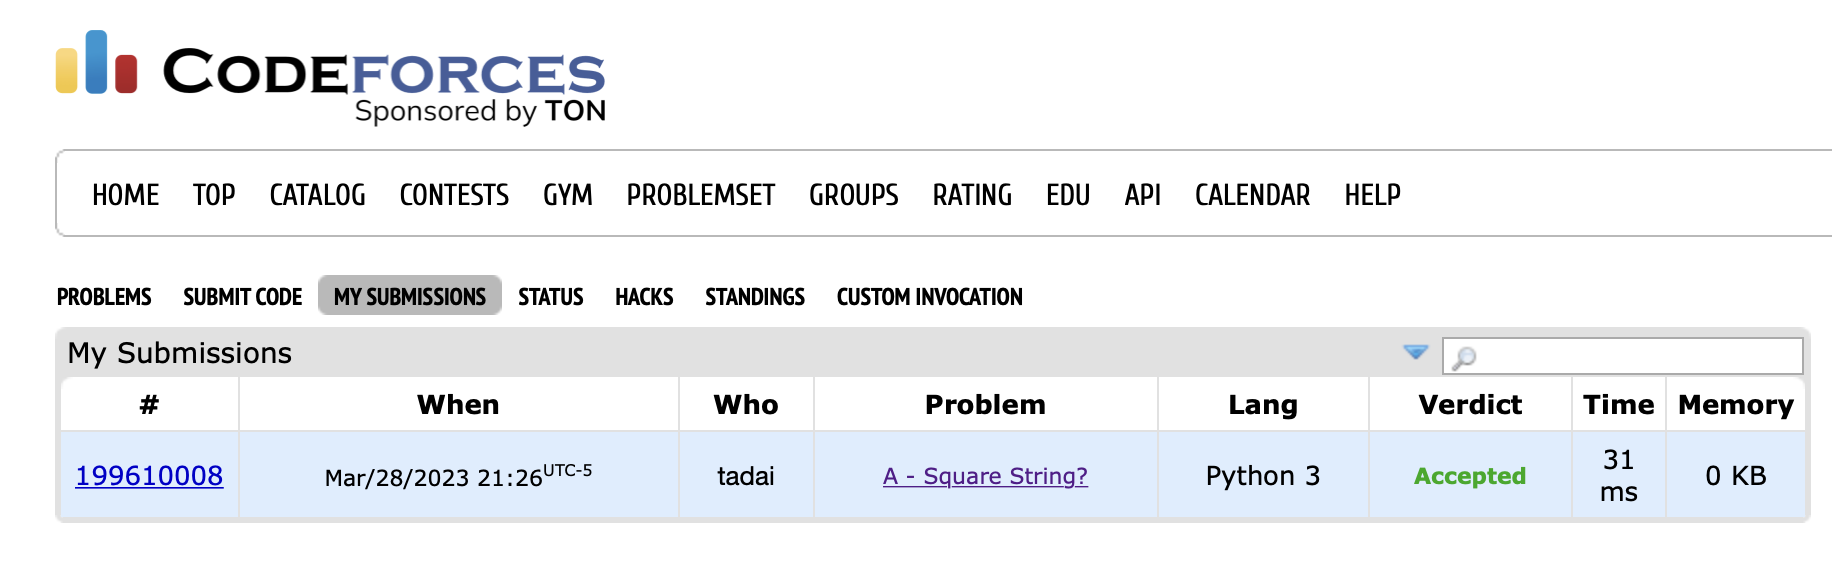

The exercise was done through Python:

In [86]:
def is_square(input_string):
    for i in range(len(input_string) // 2):
        if input_string[:i + 1] * 2 == input_string:
            return "YES"
    return "NO"

# Read the number of test cases from the user
num_tests = int(input())

# Process each test case
for _ in range(num_tests):
    input_string = input()
    print(is_square(input_string))


10
a
NO
aaa
NO
aaaa
YES
acac
YES
abab
YES
abcab
NO
xyxy
YES
xyyx
NO
xaxa
YES
axxa
NO
